In [392]:
import keras 
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from PIL import Image
import csv

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle


     |████████████████████████████████| 61kB 1.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=90abd02dea872257273cb5fc12a40e04be7bf8cf296f6a9eb3d37d0a34cfc1d9
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akhilrautela","key":"73b3f93fbf72dd33f9080781f95a3194"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d frabbisw/facial-age


 99% 830M/840M [00:08<00:00, 121MB/s] 
100% 840M/840M [00:08<00:00, 104MB/s]


In [ ]:
from zipfile import ZipFile

In [ ]:
ZipFile("facial-age.zip").extractall()

In [614]:
import os
os.getcwd()
os.chdir('/content')

In [615]:
os.chdir('face_age')

In [ ]:
sm=0
for x in sorted(os.listdir()):
  if x!="face_age":
    sm=sm+len(os.listdir(os.getcwd()+"/"+x))
    print(len(os.listdir(os.getcwd()+"/"+x)),x)
  print(sm)

In [616]:
x_train=[]
y_train=[]
count_adult=0
count_teenagers=0
count_toddlers=0
# Training data
for x in os.listdir():
  if x!="face_age":
    for y in os.listdir(os.getcwd()+"/"+x):
      img=cv2.imread(os.getcwd()+"/"+x+"/"+y)
      resize_img=cv2.resize(img,(100,100))
      bw_img=resize_img
      if int(x)<=7:
        if count_toddlers>1400:
          continue
        x_train.append(bw_img)
        count_toddlers+=1
        y_train.append([1,0,0])
      elif 9<int(x)<=19:
        x_train.append(bw_img)
        y_train.append([0,1,0])
        count_teenagers+=1
      elif 20<=int(x)<50:
        if count_adult>1400:
          continue
        x_train.append(bw_img)
        y_train.append([0,0,1])
        count_adult+=1


      

In [617]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train,y_train=sklearn.utils.shuffle(x_train,y_train)
print(x_train.shape,y_train.shape)

(4020, 100, 100, 3) (4020, 3)


[0 1 0]


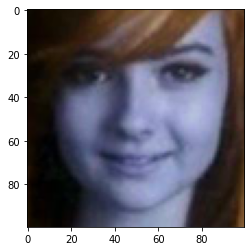

In [618]:
print(y_train[1])
plt.imshow(x_train[1])

In [619]:
x_train=x_train/255
print(count_teenagers,count_adult,count_toddlers)

1218 1401 1401


In [620]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(30,(3,3),input_shape=(100,100,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(30,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Conv2D(30,(3,3),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(3,activation='softmax'))


In [621]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 100, 100, 30)      840       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 50, 50, 30)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 50, 50, 30)        8130      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 25, 25, 30)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 25, 25, 30)        8130      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 4320)            

In [622]:
model.fit(x_train,y_train,epochs=25,batch_size=30)

Epoch 1/25
4020/4020 [==============================] - 50s 12ms/step - loss: 0.9048 - accuracy: 0.5440
Epoch 2/25
4020/4020 [==============================] - 49s 12ms/step - loss: 0.6322 - accuracy: 0.7201
Epoch 3/25
4020/4020 [==============================] - 49s 12ms/step - loss: 0.5595 - accuracy: 0.7490
Epoch 4/25
4020/4020 [==============================] - 48s 12ms/step - loss: 0.5133 - accuracy: 0.7786
Epoch 5/25
4020/4020 [==============================] - 48s 12ms/step - loss: 0.4659 - accuracy: 0.7995
Epoch 6/25
4020/4020 [==============================] - 49s 12ms/step - loss: 0.4107 - accuracy: 0.8264
Epoch 7/25
4020/4020 [==============================] - 49s 12ms/step - loss: 0.3718 - accuracy: 0.8418
Epoch 8/25
4020/4020 [==============================] - 49s 12ms/step - loss: 0.3439 - accuracy: 0.8547
Epoch 9/25
4020/4020 [==============================] - 49s 12ms/step - loss: 0.3039 - accuracy: 0.8751
Epoch 10/25
4020/4020 [==============================] - 49s 12m

In [623]:
model.predict((np.expand_dims(x_train[1], axis=0)))

array([[8.1517137e-05, 9.9578166e-01, 4.1368376e-03]], dtype=float32)

In [624]:
print(y_train[1])

[0 1 0]


In [367]:
model.save_weights("weights")

In [371]:
from zipfile import ZipFile
import os
os.chdir('/content/')
ZipFile("a1c4eb20ce8711ea.zip").extractall()

In [625]:
os.chdir("/content/Dataset")

In [576]:
os.listdir()

['Test Data.zip',
 'Sample Data.zip',
 'Test.csv',
 'Test Data',
 'Sample Submission.csv']

In [373]:
ZipFile("Test Data.zip").extractall()

In [626]:
os.chdir("Test Data")

In [ ]:
os.listdir()

In [534]:
# haar cascade unable to detect faces in some images
# dont run this cell  
'''getface=cv2.CascadeClassifier('/content/frontalface.xml')
x_test_label=[]
x_test=[]
chk=1
for x in set(os.listdir()):
  img=cv2.imread(os.getcwd()+"/"+x)
  grey=cv2.imread(x[:-4]+"grey"+".png")
  faces=getface.detectMultiScale(grey, 1.2, 4)
  all_faces=[]
  x_test_label.append(x)
  for x,y,w,h in faces:
      temp_img=img[y:y+h,x:x+w]
      face=cv2.resize(temp_img,(50,50))
      all_faces.append(face)
  x_test.append(np.array(all_faces)/255) '''

In [375]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 2.9MB/s 


In [376]:
from mtcnn.mtcnn import MTCNN

In [377]:
detector=MTCNN()

In [628]:
#used mtcnn for better result to get faces 
x_test_label=[]
x_test=[]
chk=1
for x in os.listdir():
  img=cv2.imread(os.getcwd()+"/"+x)
  faces=detector.detect_faces(img)
  x_test_label.append(x)
  all_faces=[]
  for dic in faces:
      x,y,w,h=dic['box']
      if y<0:
        y=0
      if x<0:
        x=0
      temp_img=img[y:y+h,x:x+w]
      face=cv2.resize(temp_img,(100,100))
      all_faces.append(face/255)
  x_test.append(all_faces) 

In [629]:
model.predict(np.expand_dims(x_test[0][3],axis=0))

array([[0.23184673, 0.7494352 , 0.01871808]], dtype=float32)

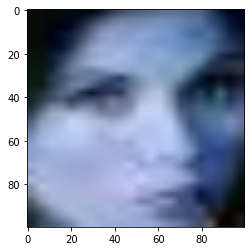

In [631]:
plt.imshow(x_test[0][3])

0


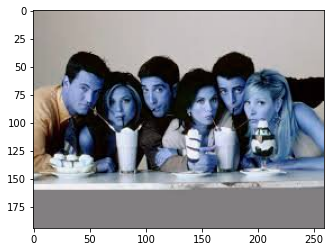

In [632]:
plt.imshow(cv2.imread("/content/Dataset/Test Data/"+x_test_label[0]))
print(x_test_label.index("Img2145.jpg"))

In [633]:
result_row=[]
count=0
for x_face,x_img in zip(x_test,x_test_label):
  if(len(x_face)==0):
  #  print(x_img)
    temp_img=cv2.imread(x_img)
    img=cv2.resize(temp_img,(100,100))
    img=img/255
    res=model.predict(np.expand_dims(img,axis=0))
    if max(res[0])==res[0][0]:
      result_row.append([x_img,"Toddler"])
      continue;
    if max(res[0])==res[0][1]:
      result_row.append([x_img,"Teenagers"])
      continue;
    if max(res[0])==res[0][2]:
      result_row.append([x_img,"Toddler"])
  else:
    count_teenagers=0
    count_adult=0
    count_toddlers=0
    for face in x_face:
      res=model.predict(np.expand_dims(face,axis=0))
      if max(res[0])==res[0][0]:
        count_toddlers+=1
      if max(res[0])==res[0][1]:
        count_teenagers+=1
      if max(res[0])==res[0][2]:
        count_adult+=1
    s=max(count_adult,count_toddlers,count_teenagers)
    if s==count_adult:
      result_row.append([x_img,"Adults"])
      continue
    if s==count_toddlers:
      result_row.append([x_img,"Toddler"])
      continue
    if s==count_teenagers:
      result_row.append([x_img,"Teenagers"])



In [634]:
os.chdir('/content')
with open("output.csv",'w') as result:
  csvwrite=csv.writer(result)
  csvwrite.writerow(["Filename","Category"])
  csvwrite.writerows(result_row)

In [609]:
print(result_row)

[['Img2145.jpg', 'Teenagers'], ['Img2154.jpg', 'Adults'], ['Img3931.jpg', 'Toddler'], ['Img1472.jpg', 'Adults'], ['Img3433.jpg', 'Toddler'], ['Img7862.jpg', 'Teenagers'], ['Img3496.jpg', 'Adults'], ['Img1288.jpg', 'Toddler'], ['Img5354.jpg', 'Toddler'], ['Img1109.jpg', 'Teenagers'], ['Img6153.jpg', 'Toddler'], ['Img2229.jpg', 'Adults'], ['Img2040.jpg', 'Adults'], ['Img7130.jpg', 'Teenagers'], ['Img7195.jpg', 'Adults'], ['Img1090.jpg', 'Adults'], ['Img2602.jpg', 'Adults'], ['Img2227.jpg', 'Adults'], ['Img5656.jpg', 'Adults'], ['Img3881.jpg', 'Adults'], ['Img1776.jpg', 'Teenagers'], ['Img3033.jpg', 'Toddler'], ['Img3983.jpg', 'Toddler'], ['Img1448.jpg', 'Toddler'], ['Img2125.jpg', 'Teenagers'], ['Img1382.jpg', 'Adults'], ['Img6057.jpg', 'Teenagers'], ['Img2085.jpg', 'Toddler'], ['Img2017.jpg', 'Teenagers'], ['Img3942.jpg', 'Adults'], ['Img1771.jpg', 'Adults'], ['Img2420.jpg', 'Adults'], ['Img1654.jpg', 'Adults'], ['Img3114.jpg', 'Toddler'], ['Img3024.jpg', 'Adults'], ['Img4163.jpg', 'Tod

In [593]:
print(len(x_test_label))
print(len(x_test))

314
314


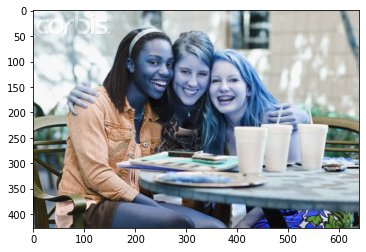

In [611]:
plt.imshow(cv2.imread("/content/Dataset/Test Data/"+"Img3983.jpg"))